In [1593]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
stud = pd.read_csv('stud_math.csv')

In [1594]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Всего 395 строк. В колонках "school", "sex", "age" пустых строк нет.

В колонках
"address" - 17,
"famsize" - 27,
"Pstatus" - 45,
"Medu"    - 3,
"Fedu"    - 24,
"Mjob"    - 19,
"Fjob"    - 36,
"reason"  - 17,
"guardian" - 31,
"traveltime" - 28,
"studytime" - 7,
"failures" - 22,
"schoolsup" - 9,
"famsup" - 39,
"paid" - 40,
"activities" - 14,
"nursery" - 16,
"studytime, granular" - 7,
"higher" - 20,
"internet" - 34,
"romantic" - 31,
"famrel" - 27,
"freetime" - 11,
"goout" - 8,
"health" - 15,
"absences" - 12,
"score" - 6   пустых строк

In [1595]:
stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
                'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime2', 'higher', 'internet',
                'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']

In [1596]:
def autoNone(x):  # Замена пустых значений на None
    
    if x == '':
        return 'None'
    elif x.lower() == 'nan':
        return 'None'
    else:
        return x
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()    

In [1597]:
stud.score = stud.score.astype(str).apply(autoNone)
stud.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
60.0     31
40.0     31
65.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
None      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Строки у которых неизвестны значения "score" безсмысленны для модели. Удаляем их.

In [1598]:
stud = stud.loc[stud['score'] != 'None' ]
stud.score = stud.score.astype(float)

In [1599]:
pd.DataFrame(stud.school.value_counts())

,school
GP,344
MS,45


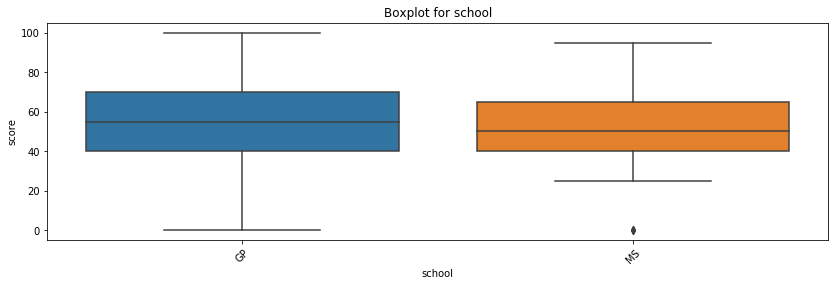

In [1600]:
get_boxplot('school')

Пустых строк нет, аномальных значений нет. Параметр не сильно влияет на оценку.

In [1601]:
pd.DataFrame(stud.sex.value_counts())

,sex
F,204
M,185


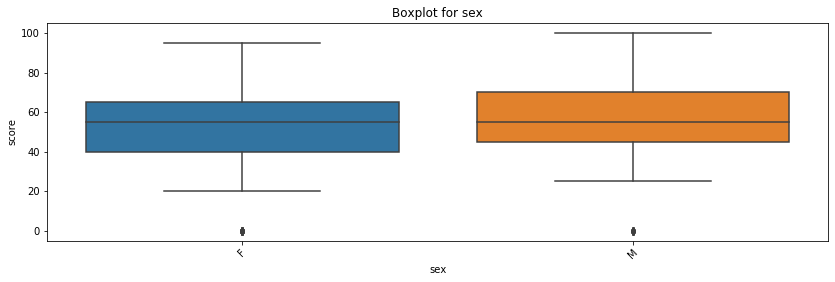

In [1602]:
get_boxplot('sex')

Пустых строк нет, аномальных значений нет. Параметр влияет на оценку.

In [1603]:
pd.DataFrame(stud.age.value_counts())

,age
16,103
17,98
15,82
18,80
19,21
20,3
22,1
21,1


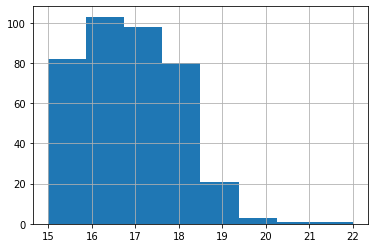

In [1604]:
stud.age.hist(bins=8)

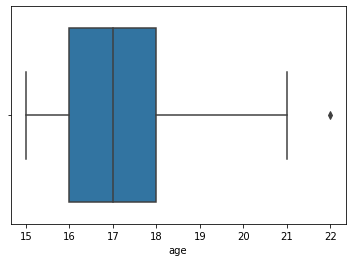

In [1605]:
sns.boxplot(stud.age)

Пустых строк нет, исходя из описания выборки вбросов нет. 
Модель построенная по этой выборке будет хорошо отражать ситуацию для учеников в возрасте 15-18 лет и будет неинформативной для возрастов 21-22 года.

In [1606]:
stud.address = stud.address.astype(str).apply(autoNone)
pd.DataFrame(stud.address.value_counts())

,address
U,291
R,83
None,15


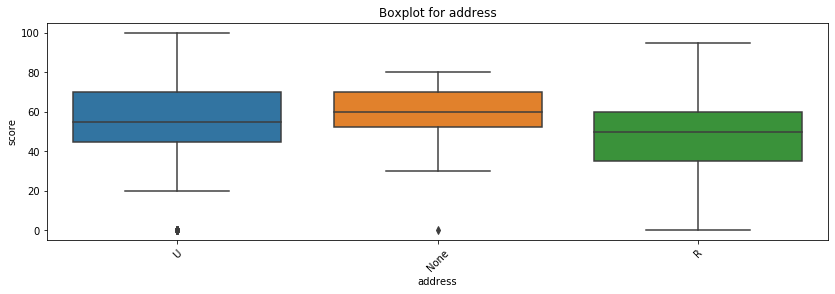

In [1607]:
get_boxplot('address')

После первой очитки в столбце осталось 15 пустых строк. Влияние пустых строк на оценку почти не отличается от наиболее популятрного варианта. Заменим пустые строки на "U". Параметр влияет на оценку.

In [1608]:
stud.loc[stud['address'] == 'None','address'] = 'U'
pd.DataFrame(stud.address.value_counts())

,address
U,306
R,83


In [1609]:
stud.famsize = stud.famsize.astype(str).apply(autoNone)
pd.DataFrame(stud.famsize.value_counts())

,famsize
GT3,255
LE3,107
None,27


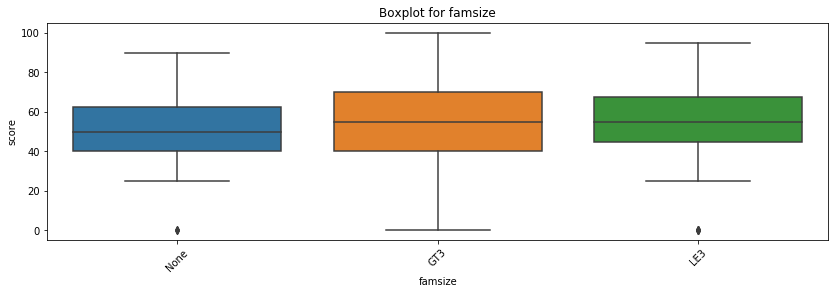

In [1610]:
get_boxplot('famsize')

В столбце осталось 27 пустых строк. Аномальных значений нет. Оценка слабо зависит от этого параметра. Можно ее не учитывать в модели.

In [1611]:
stud.Pstatus = stud.Pstatus.astype(str).apply(autoNone)
pd.DataFrame(stud.Pstatus.value_counts())

,Pstatus
T,308
None,45
A,36


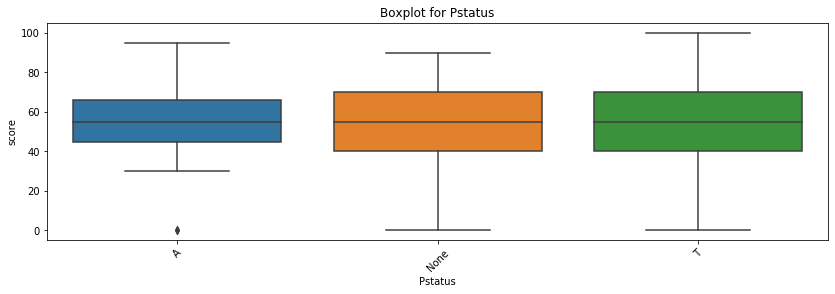

In [1612]:
get_boxplot('Pstatus')

В столбце осталось 45 пустых строк. Других ошибок нет. Параметр практически не влияет на оценку. Его можно в модели не учитывать.

In [1613]:
stud.Medu = stud.Medu.astype(str).apply(autoNone)
pd.DataFrame(stud.Medu.value_counts())

,Medu
4.0,131
2.0,100
3.0,96
1.0,56
0.0,3
None,3


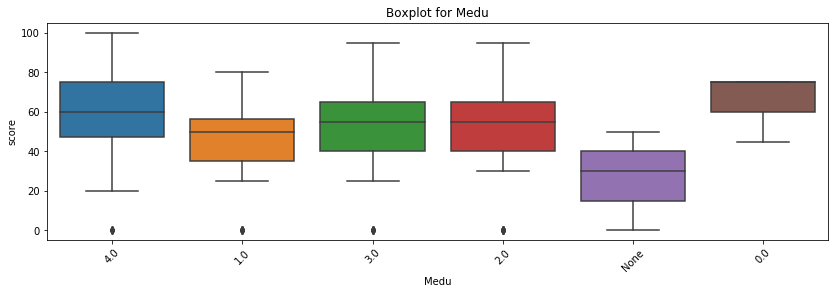

In [1614]:
get_boxplot('Medu')

Осталось 3 пустых строки. Параметр не подразумевает альтернативного значения, оценки для пропущеных значений сильно выбиваются из общей тенденции поэтому их нельзя заменить средним или модой. Удалим эти строки. Параметр значительно влияет на оценку.

In [1615]:
stud = stud.loc[stud['Medu'] != 'None' ]
pd.DataFrame(stud.Medu.value_counts())

,Medu
4.0,131
2.0,100
3.0,96
1.0,56
0.0,3


In [1616]:
stud.Fedu = stud.Fedu.astype(str).apply(autoNone)
pd.DataFrame(stud.Fedu.value_counts())

,Fedu
2.0,104
3.0,93
4.0,88
1.0,74
None,24
0.0,2
40.0,1


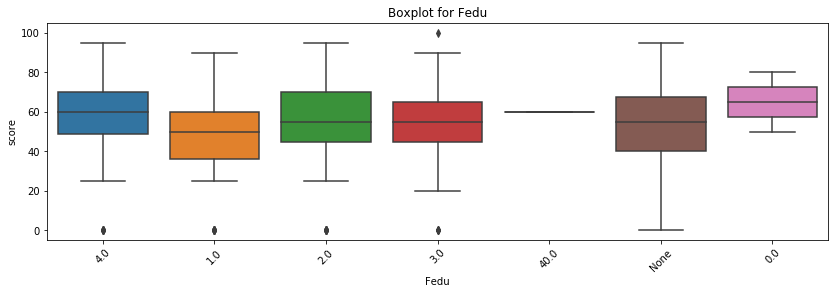

In [1617]:
get_boxplot('Fedu')

В столбце 24 пустые строки. Строка со значением 40 является выбросом и скорее всего просто опечатка, заменим ее на 4.

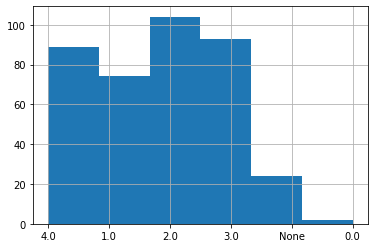

In [1618]:
stud.loc[stud['Fedu'] == '40.0','Fedu'] = '4.0'
stud.Fedu.hist(bins=6)

Оценки для пропущенных значений почти совпадают с наиболее популярным значением параметра. Заменим их на моду. Параметр слабо влияет на оценку.

In [1619]:
stud.loc[stud['Fedu'] == 'None','Fedu'] = stud.Fedu.mode()[0]
pd.DataFrame(stud.Fedu.value_counts())

,Fedu
2.0,128
3.0,93
4.0,89
1.0,74
0.0,2


In [1620]:
stud.Mjob = stud.Mjob.astype(str).apply(autoNone)
pd.DataFrame(stud.Mjob.value_counts())

,Mjob
other,125
services,97
at_home,58
teacher,55
health,32
None,19


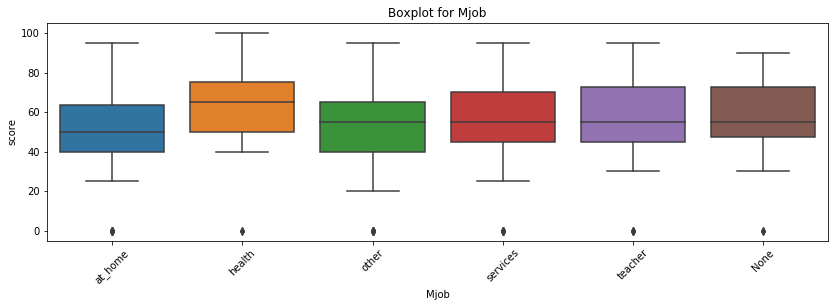

In [1621]:
get_boxplot('Mjob')

Осталось 19 пустых строк, аномальных значений нет. В этом признаке есть категория "другое", разумно пустые строки заменить этим значением. В целом оценка слабо зависит от этого параметра. Повышенная оценка при значении параметра "health", но таких значений меньшевсего в выборке.

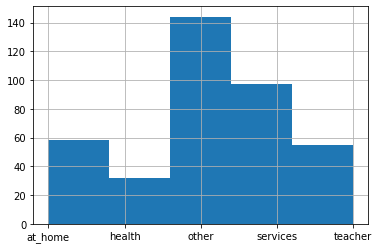

In [1622]:
stud.loc[stud['Mjob'] == 'None','Mjob'] = 'other'
stud.Mjob.hist(bins=5)

In [1623]:
stud.Fjob = stud.Fjob.astype(str).apply(autoNone)
pd.DataFrame(stud.Fjob.value_counts())

,Fjob
other,193
services,97
None,36
teacher,29
at_home,16
health,15


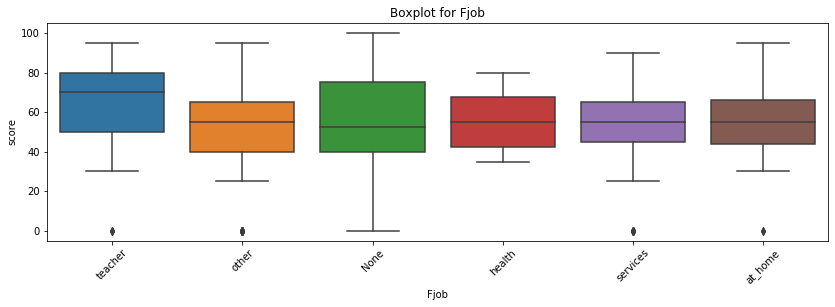

In [1624]:
get_boxplot('Fjob')

Осталось 36 пустых строк, аномальных значений нет. Пустые значения не выбиваются из общего тренда. Заменим пустые строки на "other". В целом параметр слабо влияет на оценку за исключением значения "teacher", но таких значений в выборке мало.

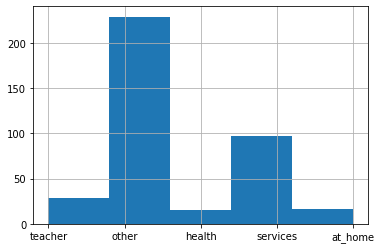

In [1625]:
stud.loc[stud['Fjob'] == 'None','Fjob'] = 'other'
stud.Fjob.hist(bins=5)

In [1626]:
stud.reason = stud.reason.astype(str).apply(autoNone)
pd.DataFrame(stud.reason.value_counts())

,reason
course,135
reputation,100
home,100
other,34
None,17


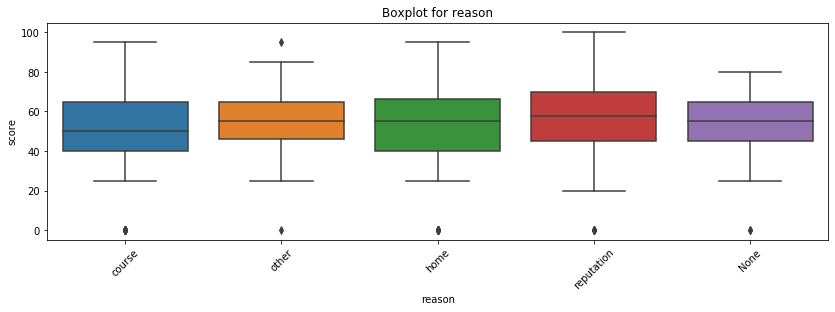

In [1627]:
get_boxplot('reason')

Осталось 17 пустых строк, аномальных значений нет. Пустые строки невыбиваются из тренда заменим их на "other". В целом это параметр слабо влияет на оценку, в модели его можно не учитывать.

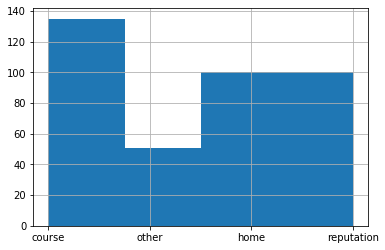

In [1628]:
stud.loc[stud['reason'] == 'None','reason'] = 'other'
stud.reason.hist(bins=4)

In [1629]:
stud.guardian = stud.guardian.astype(str).apply(autoNone)
pd.DataFrame(stud.guardian.value_counts())

,guardian
mother,247
father,84
None,31
other,24


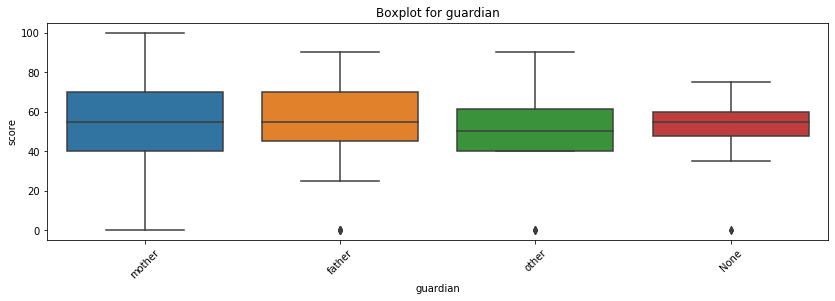

In [1630]:
get_boxplot('guardian')

Осталось 31 пустая строка, аномальных значений нет. Заменим пустые строки на "other". Параметр слабо влияет на оценку.

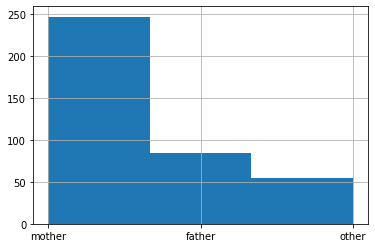

In [1631]:
stud.loc[stud['guardian'] == 'None','guardian'] = 'other'
stud.guardian.hist(bins=3)

In [1632]:
stud.traveltime = stud.traveltime.astype(str).apply(autoNone)
pd.DataFrame(stud.traveltime.value_counts())

,traveltime
1.0,236
2.0,94
None,28
3.0,21
4.0,7


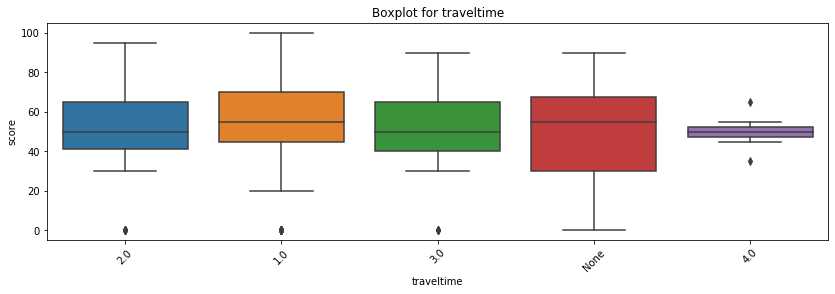

In [1633]:
get_boxplot('traveltime')

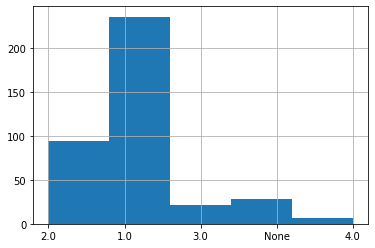

In [1634]:
stud.traveltime.hist(bins=5)

Осталось 28 пустая строка, аномальных значений нет. Оценки для пустых значений достаточно хорошо совпадают с оценками дял самого популярного варианта. Заменим их на моду.Параметр слабо влияет на оценку.

In [1635]:
stud.loc[stud['traveltime'] == 'None','traveltime'] = stud.traveltime.mode()[0]
pd.DataFrame(stud.traveltime.value_counts())

,traveltime
1.0,264
2.0,94
3.0,21
4.0,7


In [1636]:
stud.studytime = stud.studytime.astype(str).apply(autoNone)
pd.DataFrame(stud.studytime.value_counts())

,studytime
2.0,187
1.0,102
3.0,63
4.0,27
None,7


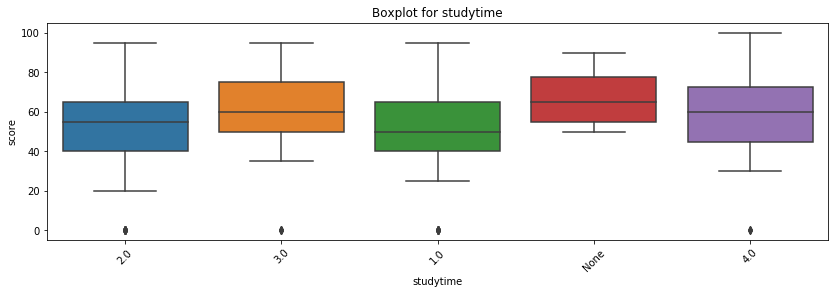

In [1637]:
get_boxplot('studytime')

Осталось 7 пустых строк, аномальных значений нет. Оценки для пустых строк значительно отличаются от наиболее популяных вариантов т.к. таких строк немного удалим их. В целом параметр можетвлиять оценку.

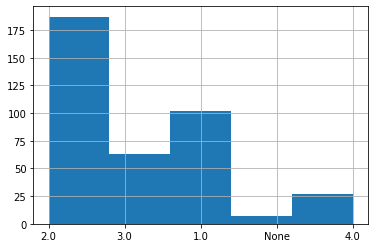

In [1638]:
stud.studytime.hist(bins=5)

In [1639]:
stud = stud.loc[stud['studytime'] != 'None' ]
pd.DataFrame(stud.studytime.value_counts())

,studytime
2.0,187
1.0,102
3.0,63
4.0,27


In [1640]:
stud.failures = stud.failures.astype(str).apply(autoNone)
pd.DataFrame(stud.failures.value_counts())

,failures
0.0,284
1.0,46
None,21
3.0,14
2.0,14


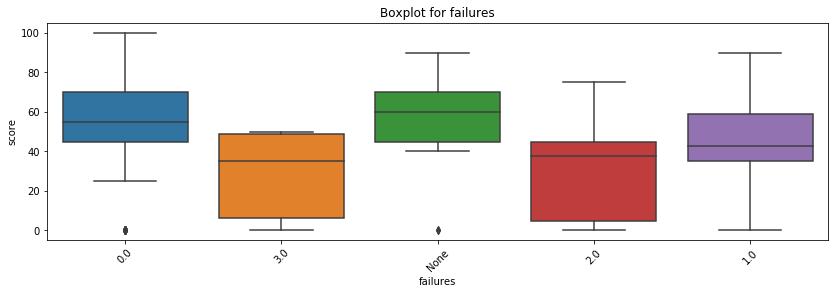

In [1641]:
get_boxplot('failures')

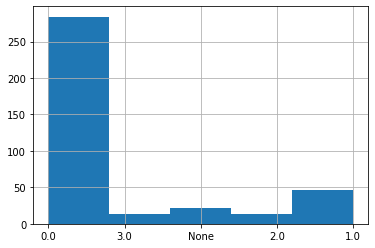

In [1642]:
stud.failures.hist(bins=5)

Осталось 21 пустая строка, аномальных значений нет. Параметр сильно влияет на оценку. Оценки дял пустых строк почти совпадают с популярным вариантом, заменим их на моду.

In [1643]:
stud.loc[stud['failures'] == 'None','failures'] = stud.failures.mode()[0]
pd.DataFrame(stud.failures.value_counts())

,failures
0.0,305
1.0,46
3.0,14
2.0,14


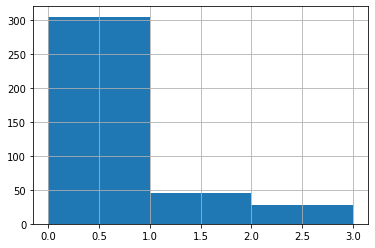

In [1644]:
stud.failures = stud.failures.astype(float)
stud.failures = stud.failures.astype(int)
stud.failures.hist(bins=3)

In [1645]:
stud.schoolsup = stud.schoolsup.astype(str).apply(autoNone)
pd.DataFrame(stud.schoolsup.value_counts())

,schoolsup
no,324
yes,46
None,9


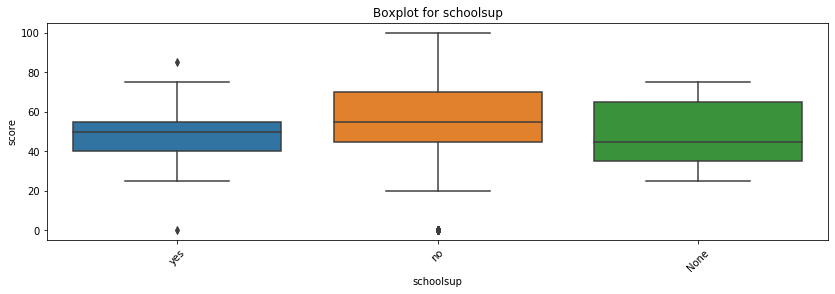

In [1646]:
get_boxplot('schoolsup')

Осталось 9 пустых строк, аномальных значений нет. Оценки для пустых строк выбиваются из общей тенденции, так как таких строк немного удалим их. В целом параметр слабовлияет на оценку.

In [1647]:
stud = stud.loc[stud['schoolsup'] != 'None' ]
pd.DataFrame(stud.schoolsup.value_counts())

,schoolsup
no,324
yes,46


In [1648]:
stud.famsup = stud.famsup.astype(str).apply(autoNone)
pd.DataFrame(stud.famsup.value_counts())

,famsup
yes,208
no,125
None,37


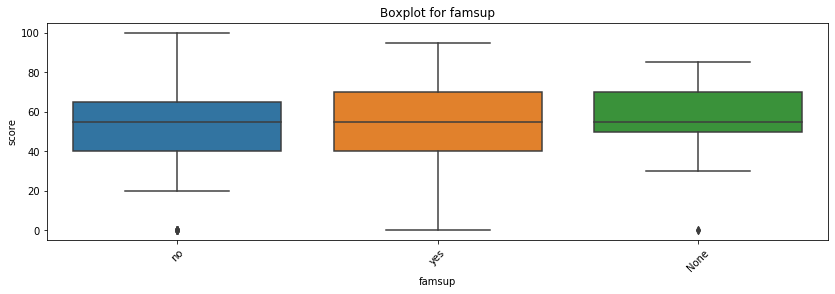

In [1649]:
get_boxplot('famsup')

Осталось 37 пустых значений. В целом параметр слабо влияет на оценку и оценки для пустых строк не выбиваются из общей тенденции, заменим пустые строки на моду.

In [1650]:
stud.loc[stud['famsup'] == 'None','famsup'] = stud.famsup.mode()[0]
pd.DataFrame(stud.famsup.value_counts())

,famsup
yes,245
no,125


In [1651]:
stud.paid = stud.paid.astype(str).apply(autoNone)
pd.DataFrame(stud.paid.value_counts())

,paid
no,185
yes,146
None,39


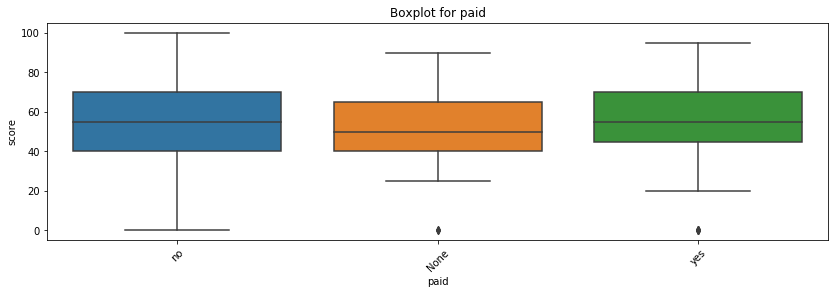

In [1652]:
get_boxplot('paid')

Осталось 39 пустых значений. В целом параметр слабо влияет на оценку и оценки для пустых строк не выбиваются из общей тенденции, заменим пустые строки на моду.

In [1653]:
stud.loc[stud['paid'] == 'None','paid'] = stud.paid.mode()[0]
pd.DataFrame(stud.paid.value_counts())

,paid
no,224
yes,146


In [1654]:
stud.activities = stud.activities.astype(str).apply(autoNone)
pd.DataFrame(stud.activities.value_counts())

,activities
yes,184
no,172
None,14


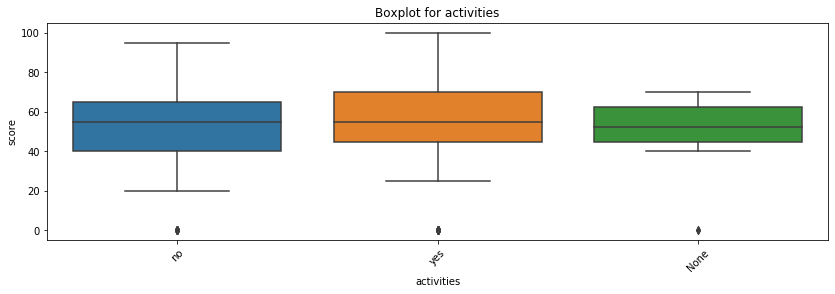

In [1655]:
get_boxplot('activities')

Осталось 14 пустых значений. В целом параметр слабо влияет на оценку и оценки для пустых строк не выбиваются из общей тенденции, заменим пустые строки на моду.

In [1656]:
stud.loc[stud['activities'] == 'None','activities'] = stud.activities.mode()[0]
pd.DataFrame(stud.activities.value_counts())

,activities
yes,198
no,172


In [1657]:
stud.nursery = stud.nursery.astype(str).apply(autoNone)
pd.DataFrame(stud.nursery.value_counts())

,nursery
yes,281
no,74
None,15


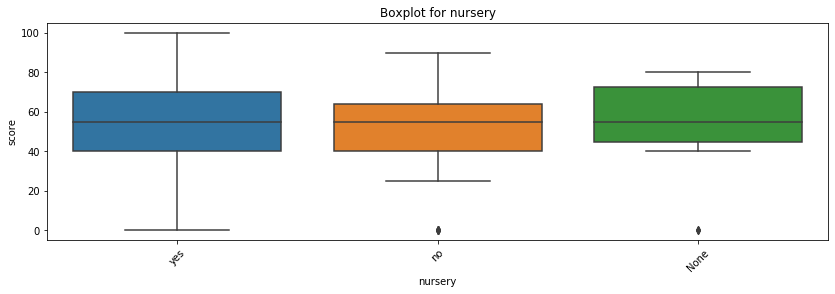

In [1658]:
get_boxplot('nursery')

Осталось 15 пустых значений. В целом параметр слабо влияет на оценку и оценки для пустых строк совпадают с популярным вариантом, заменим пустые строки на моду.

In [1659]:
stud.loc[stud['nursery'] == 'None','nursery'] = stud.nursery.mode()[0]
pd.DataFrame(stud.nursery.value_counts())

,nursery
yes,296
no,74


In [1660]:
stud.higher = stud.higher.astype(str).apply(autoNone)
pd.DataFrame(stud.higher.value_counts())

,higher
yes,334
no,18
None,18


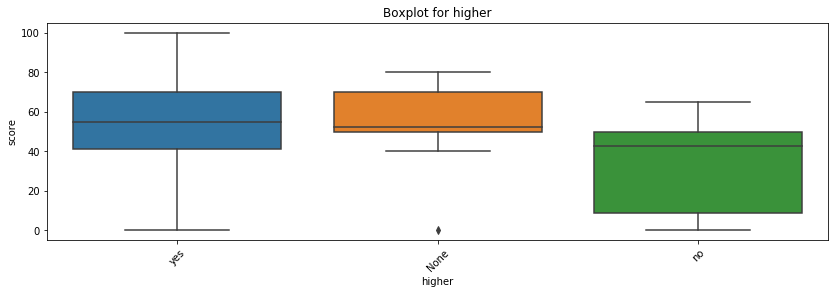

In [1661]:
get_boxplot('higher')

Осталось 18 пустых значений. Параметр влияет на оценку. Оценки для пустых строк входят в диапазон популярного варианта и почти не пересекают не популярный вариант, заменим пустые строки на моду.

In [1662]:
stud.loc[stud['higher'] == 'None','higher'] = stud.higher.mode()[0]
pd.DataFrame(stud.higher.value_counts())

,higher
yes,352
no,18


In [1663]:
stud.internet = stud.internet.astype(str).apply(autoNone)
pd.DataFrame(stud.internet.value_counts())

,internet
yes,288
no,49
None,33


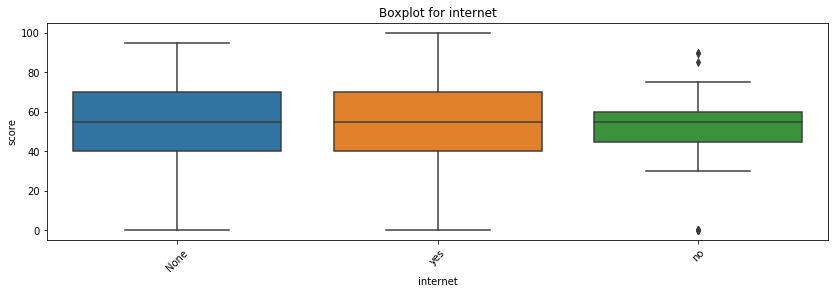

In [1664]:
get_boxplot('internet')

Осталось 33 пустых значений. Параметр слабо влияет на оценку. Оценки для пустых строк совпадают с популярным вариантом, заменим пустые строки на моду.

In [1665]:
stud.loc[stud['internet'] == 'None','internet'] = stud.higher.mode()[0]
pd.DataFrame(stud.internet.value_counts())

,internet
yes,321
no,49


In [1666]:
stud.romantic = stud.romantic.astype(str).apply(autoNone)
pd.DataFrame(stud.romantic.value_counts())

,romantic
no,225
yes,118
None,27


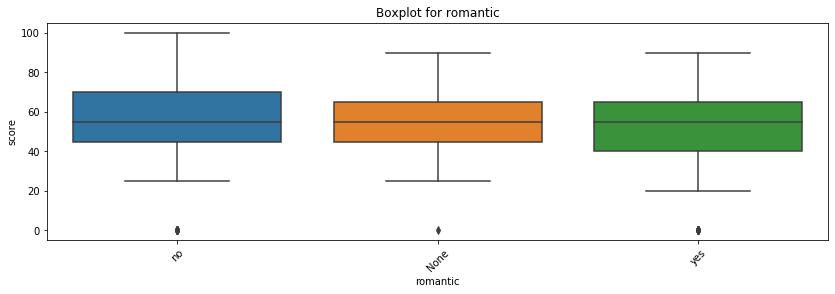

In [1667]:
get_boxplot('romantic')

Осталось 27 пустых значений. Параметр можетвлиять на оценку. Оценки для пустых строк не выбиваются из общей тенденции, заменим пустые строки на моду.

In [1668]:
stud.loc[stud['romantic'] == 'None','romantic'] = stud.romantic.mode()[0]
pd.DataFrame(stud.romantic.value_counts())

,romantic
no,252
yes,118


In [1669]:
stud.famrel = stud.famrel.astype(str).apply(autoNone)
pd.DataFrame(stud.famrel.value_counts())

,famrel
4.0,172
5.0,91
3.0,57
None,27
2.0,15
1.0,7
-1.0,1


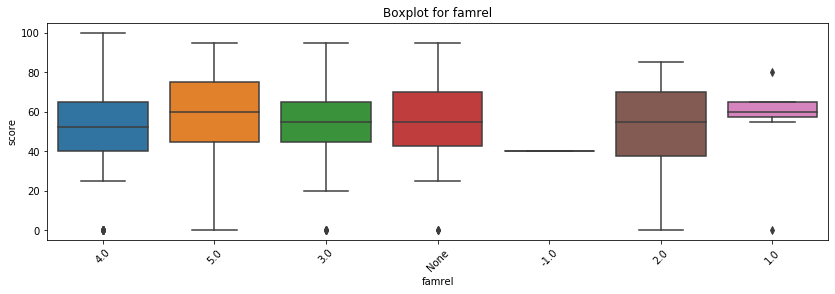

In [1670]:
get_boxplot('famrel')

Осталось 27 пустых значений. Значение "-1.0" скорее всего опечатка, заменим на "1.0". Параметр слабо влияет на оценку. Заменим пустые строки на моду.

In [1671]:
stud.loc[stud['famrel'] == 'None','famrel'] = stud.famrel.mode()[0]
stud.loc[stud['famrel'] == '-1.0','famrel'] = "1.0"
pd.DataFrame(stud.famrel.value_counts())

,famrel
4.0,199
5.0,91
3.0,57
2.0,15
1.0,8


In [1672]:
stud.freetime = stud.freetime.astype(str).apply(autoNone)
pd.DataFrame(stud.freetime.value_counts())

,freetime
3.0,146
4.0,107
2.0,60
5.0,32
1.0,17
None,8


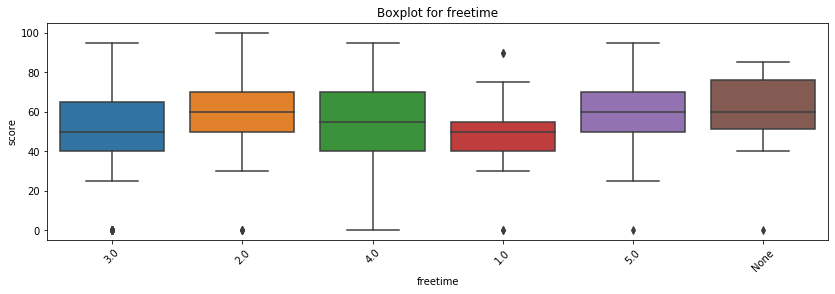

In [1673]:
get_boxplot('freetime')

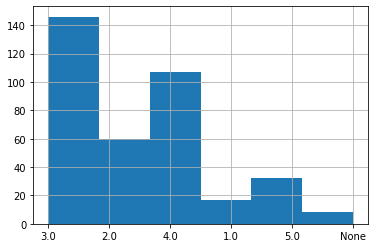

In [1674]:
stud.freetime.hist(bins=6)

Осталось 8 пустых значений. Параметр может влиять на оценку. Пустые строки плохо вписываются в популярные значения, так как их немного удалим их.

In [1675]:
stud = stud.loc[stud['freetime'] != 'None' ]
pd.DataFrame(stud.freetime.value_counts())

,freetime
3.0,146
4.0,107
2.0,60
5.0,32
1.0,17


In [1676]:
stud.goout = stud.goout.astype(str).apply(autoNone)
pd.DataFrame(stud.goout.value_counts())

C:\Users\qwer\anaconda3\lib\site-packages\IPython\core\displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,goout
3.0,118
2.0,93
4.0,76
5.0,48
1.0,21
None,6


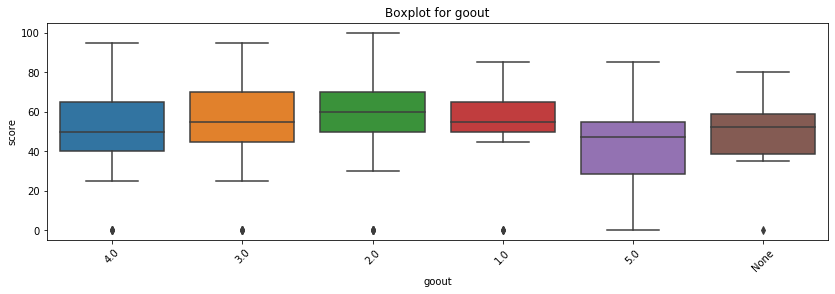

In [1677]:
get_boxplot('goout')

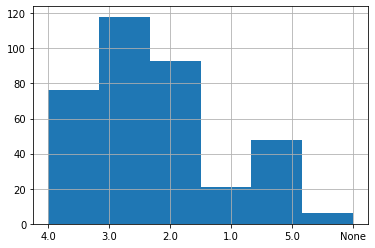

In [1678]:
stud.goout.hist(bins=6)

Осталось 6 пустых значений. Параметр влияет на оценку. Пустые строки плохо вписываются в популярные значения, так как их немного удалим их.

In [1679]:
stud = stud.loc[stud['goout'] != 'None' ]
pd.DataFrame(stud.freetime.value_counts())

,freetime
3.0,142
4.0,106
2.0,60
5.0,32
1.0,16


In [1680]:
stud.health = stud.health.astype(str).apply(autoNone)
pd.DataFrame(stud.health.value_counts())

,health
5.0,126
3.0,80
4.0,56
1.0,42
2.0,38
None,14


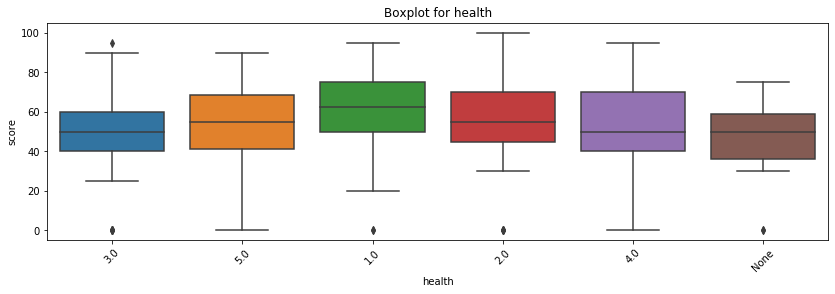

In [1681]:
get_boxplot('health')

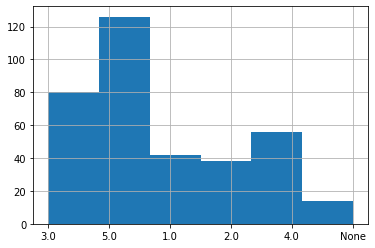

In [1682]:
stud.health.hist(bins=6)

Осталось 14 пустых значений. Параметр может влиять на оценку. Пустые строки хорошо вписываются в популярные значения, заменим их на моду.

In [1683]:
stud.loc[stud['health'] == 'None','health'] = stud.health.mode()[0]
pd.DataFrame(stud.health.value_counts())

,health
5.0,140
3.0,80
4.0,56
1.0,42
2.0,38


In [1684]:
stud.absences = stud.absences.astype(str).apply(autoNone)
stud.loc[stud['absences'] == 'None','absences'].value_counts()

None    9
Name: absences, dtype: int64

Осталось 9 пустых строк. Удалим их.

In [1685]:
stud = stud.loc[stud['absences'] != 'None' ]
stud.absences = stud.absences.astype(float)
stud.absences = stud.absences.astype(int)

Значение больше 365 скорее всего являются опечаткой, удалим их.

In [1686]:
stud = stud.loc[stud['absences'] <= 365 ]

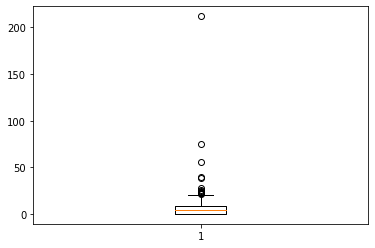

In [1687]:
plt.boxplot(stud.absences) 
plt.show()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


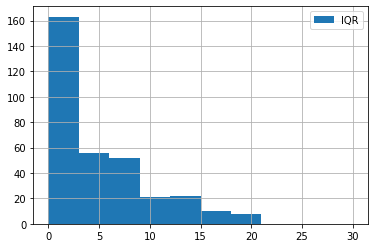

In [1688]:
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 30), 
                                                                                             label = 'IQR')
plt.legend();

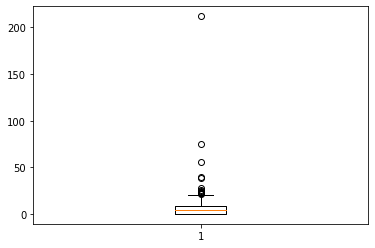

In [1689]:
import matplotlib.pyplot as plt
plt.boxplot(stud.absences) 
plt.show()

In [1690]:
len(stud.loc[stud['absences'] > 20,'absences'])

14

за границы выбросов попали 14 значений
удалим их.

In [1691]:
stud = stud.loc[stud['absences'] <= 20 ]

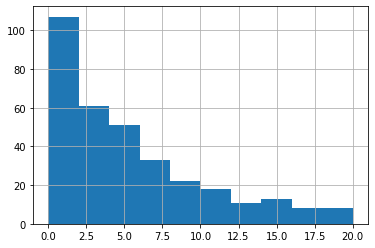

In [1692]:
stud.absences.hist()

Проведем тест стьюдента

In [1693]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [1694]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
            'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
            'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


In [1695]:
stud.studytime2 = stud.studytime2.astype(str).apply(autoNone)
stud.loc[stud['studytime2'] == 'None','studytime2'].value_counts()

Series([], Name: studytime2, dtype: int64)

Столбец не содержит пустых значений.

In [1696]:
stud.studytime2 = stud.studytime2.astype(float)
stud.studytime2  = stud.studytime2.astype(int)

In [1697]:
stud.age = stud.age.astype(float)
stud.age  = stud.age.astype(int)

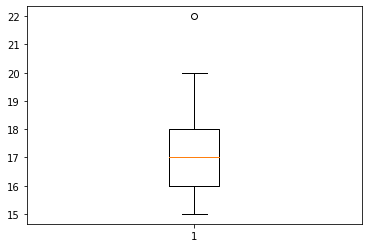

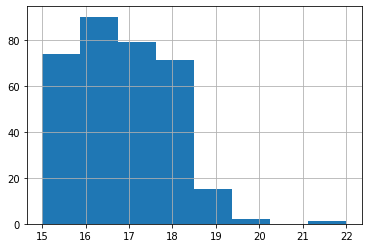

In [1698]:
plt.boxplot(stud.age) 
plt.show()
stud.age.hist(bins=8)

In [1699]:
median = stud.age.median()
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


Значение 22 входит в допустимый диапазон. Но так как модель построенная поо данной выборке будет похо описывать значения для возрастов 20-21, можно принять значения 22 за выброс.Удалим выбросы.

In [1700]:
stud = stud.loc[stud.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [1701]:
stud.Medu = stud.Medu.astype(float)
stud.Medu  = stud.Medu.astype(int)

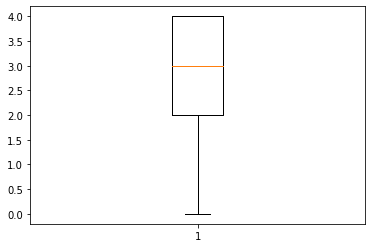

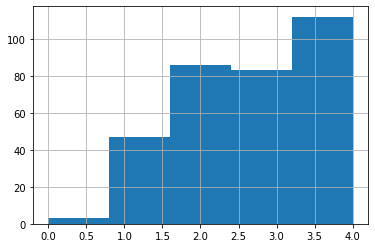

In [1702]:
plt.boxplot(stud.Medu) 
plt.show()
stud.Medu.hist(bins=5)

Выбросов нет. Матери в основном образованые.

In [1703]:
stud.Fedu = stud.Fedu.astype(float)
stud.Fedu  = stud.Fedu.astype(int)

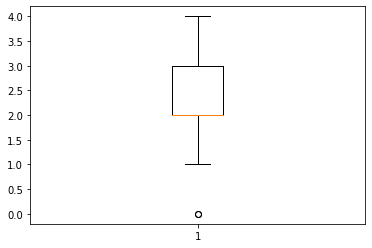

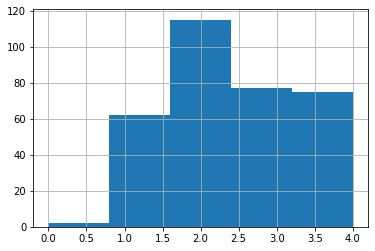

In [1704]:
plt.boxplot(stud.Fedu) 
plt.show()
stud.Fedu.hist(bins=5)

Отцы имеют в основном среднее образование. Есть один выброс. Удалим его.

In [1705]:
median = stud.Fedu.median()
IQR = stud.Fedu.quantile(0.75) - stud.Fedu.quantile(0.25)
perc25 = stud.Fedu.quantile(0.25)
perc75 = stud.Fedu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


In [1706]:
stud = stud.loc[stud.Fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [1707]:
stud.traveltime = stud.traveltime.astype(float)
stud.traveltime  = stud.traveltime.astype(int)

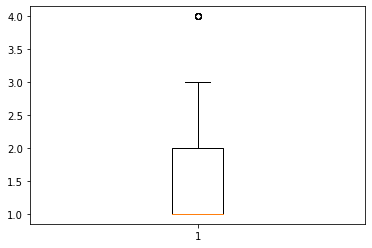

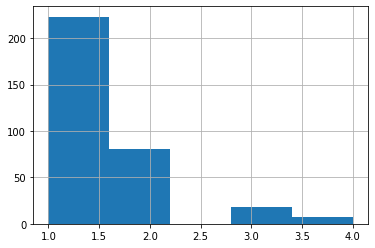

In [1708]:
plt.boxplot(stud.traveltime) 
plt.show()
stud.traveltime.hist(bins=5)

в основно школы находятся недалеко от дома. Есть выброс.

In [1709]:
median = stud.traveltime.median()
IQR = stud.traveltime.quantile(0.75) - stud.traveltime.quantile(0.25)
perc25 = stud.traveltime.quantile(0.25)
perc75 = stud.traveltime.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud = stud.loc[stud.traveltime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


In [1710]:
stud.studytime = stud.studytime.astype(float)
stud.studytime  = stud.studytime.astype(int)

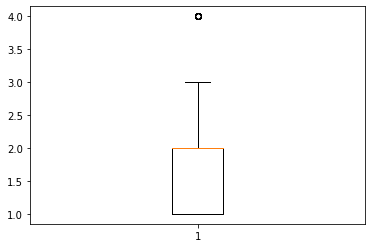

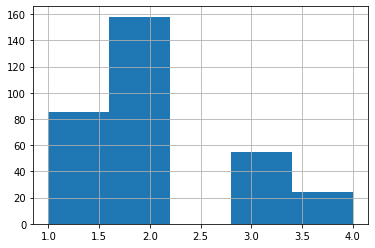

In [1711]:
plt.boxplot(stud.studytime) 
plt.show()
stud.studytime.hist(bins=5)

Чаще всего ученики занимаются 2-2,5 часа вне школы, есть выброс.

In [1712]:
median = stud.studytime.median()
IQR = stud.studytime.quantile(0.75) - stud.studytime.quantile(0.25)
perc25 = stud.studytime.quantile(0.25)
perc75 = stud.studytime.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud = stud.loc[stud.studytime.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


In [1713]:
stud.failures = stud.failures.astype(float)
stud.failures  = stud.failures.astype(int)

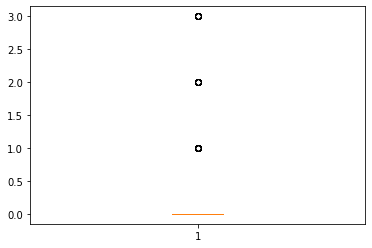

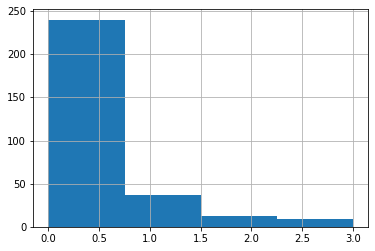

In [1714]:
plt.boxplot(stud.failures) 
plt.show()
stud.failures.hist(bins=4)

Большая часть учащихся удачливы либо очень неудачливы.Все прочие значения попали за границы выброса. Удалять их не стоит.

In [1715]:
stud.famrel = stud.famrel.astype(float)
stud.famrel  = stud.famrel.astype(int)

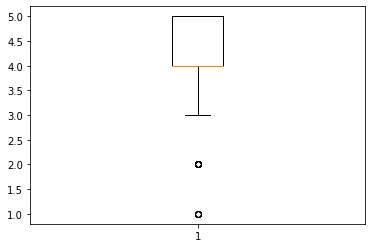

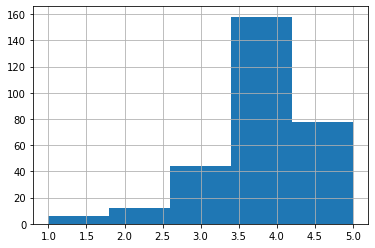

In [1716]:
plt.boxplot(stud.famrel) 
plt.show()
stud.famrel.hist(bins=5)

В большинстве семей хорошие отношения. Низкие значения можно принять за выбросы.

In [1717]:
median = stud.famrel.median()
IQR = stud.famrel.quantile(0.75) - stud.famrel.quantile(0.25)
perc25 = stud.famrel.quantile(0.25)
perc75 = stud.famrel.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud = stud.loc[stud.famrel.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


In [1718]:
stud.freetime = stud.freetime.astype(float)
stud.freetime  = stud.freetime.astype(int)

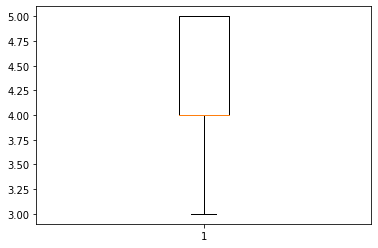

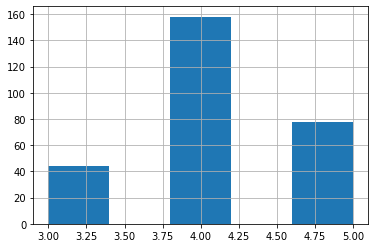

In [1719]:
plt.boxplot(stud.famrel) 
plt.show()
stud.famrel.hist(bins=5)

Большинство студентов имеет достаточно свободного времени.

In [1720]:
stud.goout  = stud.goout.astype(float)
stud.goout   = stud.goout.astype(int)

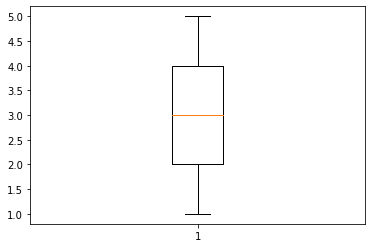

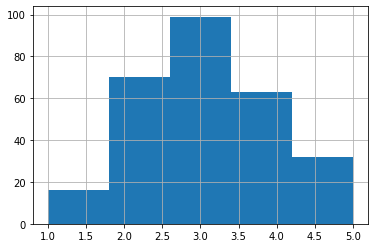

In [1721]:
plt.boxplot(stud.goout) 
plt.show()
stud.goout.hist(bins=5)

большая часть студентов проводит достаточно времени с друзьями.

In [1722]:
stud.health  = stud.health.astype(float)
stud.health   = stud.health.astype(int)

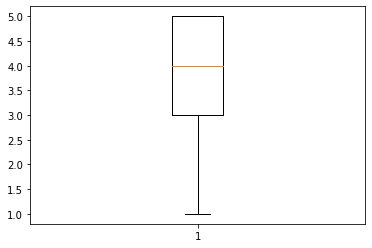

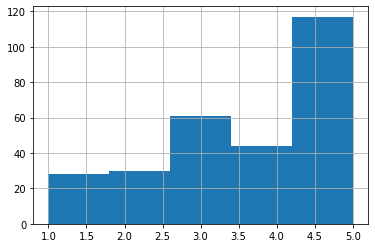

In [1723]:
plt.boxplot(stud.health) 
plt.show()
stud.health.hist(bins=5)

большая часть студентов имеет очень хорошее здоровье.

In [1724]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime2,famrel,freetime,goout,health,absences,score
age,1.000000,-0.154054,-0.177103,0.133277,0.090661,0.144846,-0.090661,0.003945,0.015483,0.162697,-0.041540,0.152703,-0.157106
Medu,-0.154054,1.000000,0.584255,-0.121565,0.086725,-0.217337,-0.086725,0.118181,0.036729,0.031980,-0.034563,0.053517,0.183746
Fedu,-0.177103,0.584255,1.000000,-0.005911,0.052378,-0.252282,-0.052378,0.027576,-0.065802,0.000517,0.001807,-0.044300,0.112767
traveltime,0.133277,-0.121565,-0.005911,1.000000,-0.126408,0.017443,0.126408,-0.050952,-0.026182,-0.017871,-0.029133,-0.056839,-0.046855
studytime,0.090661,0.086725,0.052378,-0.126408,1.000000,-0.098861,-1.000000,0.097616,-0.098843,-0.003293,-0.061683,-0.069286,0.123032
failures,0.144846,-0.217337,-0.252282,0.017443,-0.098861,1.000000,0.098861,-0.029634,0.073059,0.044592,0.105116,0.085327,-0.358395
studytime2,-0.090661,-0.086725,-0.052378,0.126408,-1.000000,0.098861,1.000000,-0.097616,0.098843,0.003293,0.061683,0.069286,-0.123032
famrel,0.003945,0.118181,0.027576,-0.050952,0.097616,-0.029634,-0.097616,1.000000,0.132476,0.045959,-0.009327,-0.026895,0.081783
freetime,0.015483,0.036729,-0.065802,-0.026182,-0.098843,0.073059,0.098843,0.132476,1.000000,0.199886,0.050072,0.145783,0.060877
goout,0.162697,0.031980,0.000517,-0.017871,-0.003293,0.044592,0.003293,0.045959,0.199886,1.000000,0.024006,0.143440,-0.168926


столбцы "studytime2" и "studytime" имеют 100% кореляцию. studytime2 можно удалить.
Есть заметная кореляция между образованием отца и матери. Так же это положительно сказывается на оценкх. Внеклассное обучение сказывается положительно, а количесво неудачь отрицательно и достаточно весомо. Интересно что значительное время проводимое с друзьями снижает оценку. С возрастом оценки так же ухутшаются.
Остальные переменные слабо скорелированы.

В целом выборка достаточно хорошая, пустых значений немного. Ошибочные значения и выбросы встречаются в еденичном случае.
для построения модели нужно оставить переменные "sex", "address", "Medu", "failures", "higher", "romantic", "goout", рассматривать их как номинативные переменные и численные переменные "age" и "absences". Если будет необходимо уточнить модель можно учеть номинативные переменные "health", "freetime", "studytime".


In [1725]:
del stud['studytime2']
del stud['school']
del stud['famsize']
del stud['Pstatus']
del stud['Fedu']
del stud['Mjob']
del stud['Fjob']
del stud['reason']
del stud['guardian']
del stud['traveltime']
del stud['schoolsup']
del stud['famsup']
del stud['paid']
del stud['activities']
del stud['nursery']
del stud['internet']
del stud['famrel']
display(stud.head(10))

,sex,age,address,Medu,studytime,failures,higher,romantic,freetime,goout,health,absences,score
0,F,18,U,4,2,0,yes,no,3,4,3,6,30.0
1,F,17,U,1,2,0,yes,no,3,3,3,4,30.0
2,F,15,U,1,2,3,yes,no,3,2,3,10,50.0
3,F,15,U,4,3,0,yes,yes,2,2,5,2,75.0
4,F,16,U,3,2,0,yes,no,3,2,5,4,50.0
5,M,16,U,4,2,0,yes,no,4,2,5,10,75.0
6,M,16,U,2,2,0,yes,no,4,4,3,0,55.0
7,F,17,U,4,2,0,yes,no,1,4,1,6,30.0
8,M,15,U,3,2,0,yes,no,2,2,1,0,95.0
9,M,15,U,3,2,0,yes,no,5,1,5,0,75.0
